In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('train.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2

 Data Types:
ID           int64
Datetime    object
Count        int64
dtype: object


In [3]:
from datetime import datetime
dateparse = lambda dates: datetime.strptime(dates, '%d-%m-%Y %H:%M')
print(type(dateparse))
data = pd.read_csv('train.csv', parse_dates=[1], index_col='Datetime',date_parser=dateparse)
print(data.head())

<class 'function'>
                     ID  Count
Datetime                      
2012-08-25 00:00:00   0      8
2012-08-25 01:00:00   1      2
2012-08-25 02:00:00   2      6
2012-08-25 03:00:00   3      2
2012-08-25 04:00:00   4      2


In [4]:
print(data.dtypes)

ID       int64
Count    int64
dtype: object


In [5]:
data.index

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq=None)

In [6]:
ts = data['Count']
ts.head(10)

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
2012-08-25 05:00:00    2
2012-08-25 06:00:00    2
2012-08-25 07:00:00    2
2012-08-25 08:00:00    6
2012-08-25 09:00:00    2
Name: Count, dtype: int64

In [7]:
ts['2012-08-25']

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
2012-08-25 05:00:00    2
2012-08-25 06:00:00    2
2012-08-25 07:00:00    2
2012-08-25 08:00:00    6
2012-08-25 09:00:00    2
2012-08-25 10:00:00    2
2012-08-25 11:00:00    6
2012-08-25 12:00:00    4
2012-08-25 13:00:00    2
2012-08-25 14:00:00    6
2012-08-25 15:00:00    2
2012-08-25 16:00:00    2
2012-08-25 17:00:00    2
2012-08-25 18:00:00    2
2012-08-25 19:00:00    2
2012-08-25 20:00:00    2
2012-08-25 21:00:00    6
2012-08-25 22:00:00    2
2012-08-25 23:00:00    2
Name: Count, dtype: int64

In [8]:
ts['2012-08-25':'2012-08-26']

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
2012-08-25 05:00:00    2
2012-08-25 06:00:00    2
2012-08-25 07:00:00    2
2012-08-25 08:00:00    6
2012-08-25 09:00:00    2
2012-08-25 10:00:00    2
2012-08-25 11:00:00    6
2012-08-25 12:00:00    4
2012-08-25 13:00:00    2
2012-08-25 14:00:00    6
2012-08-25 15:00:00    2
2012-08-25 16:00:00    2
2012-08-25 17:00:00    2
2012-08-25 18:00:00    2
2012-08-25 19:00:00    2
2012-08-25 20:00:00    2
2012-08-25 21:00:00    6
2012-08-25 22:00:00    2
2012-08-25 23:00:00    2
2012-08-26 00:00:00    4
2012-08-26 01:00:00    6
2012-08-26 02:00:00    2
2012-08-26 03:00:00    4
2012-08-26 04:00:00    2
2012-08-26 05:00:00    2
2012-08-26 06:00:00    2
2012-08-26 07:00:00    2
2012-08-26 08:00:00    2
2012-08-26 09:00:00    4
2012-08-26 10:00:00    2
2012-08-26 11:00:00    2
2012-08-26 12:00:00    8
2012-08-26 13:00:00    6
2012-08-26 14:00:00    6
2012-08-26 15:00

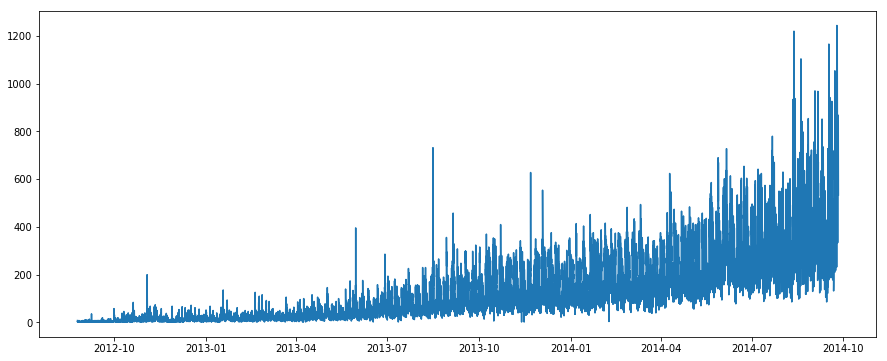

In [9]:
plt.plot(ts)

In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # Determine rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  import sys


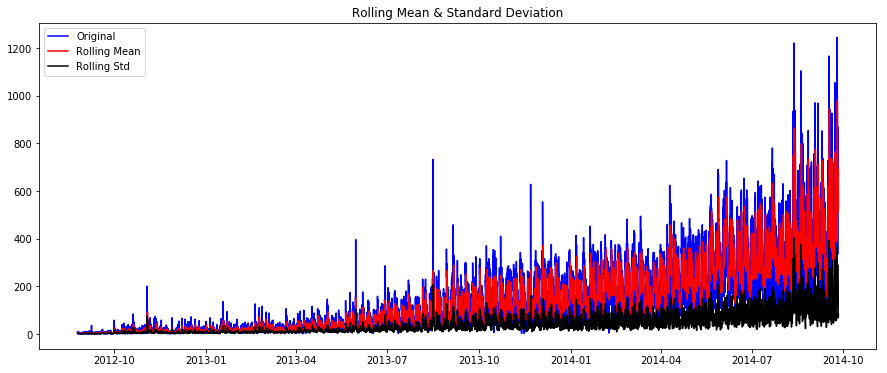

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (5%)               -2.861698
Critical Value (1%)               -3.430709
Critical Value (10%)              -2.566854
dtype: float64


In [11]:
test_stationarity(ts)

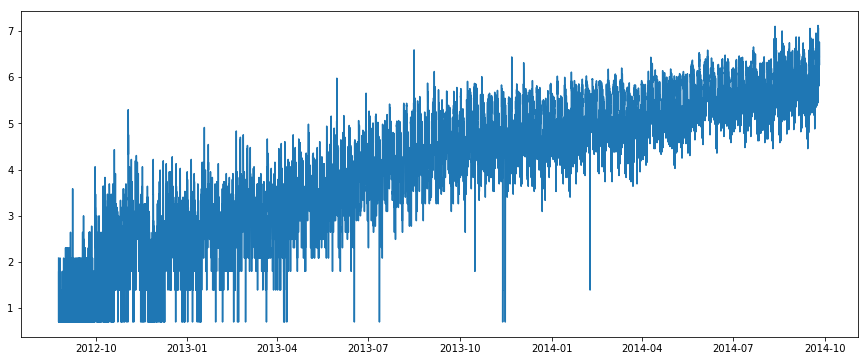

In [12]:
ts_log = np.log(ts)
plt.plot(ts_log)

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """Entry point for launching an IPython kernel.


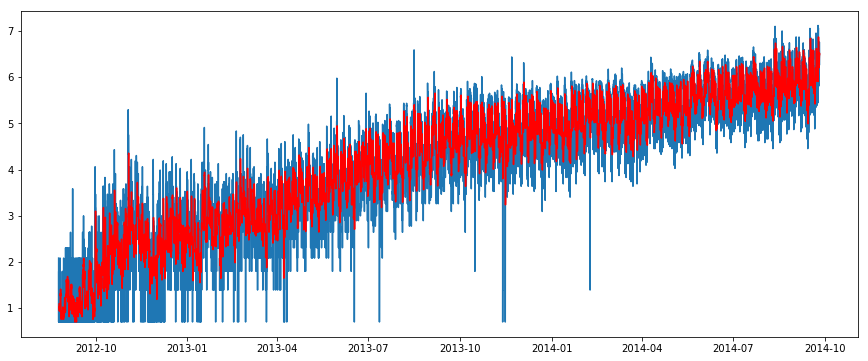

In [13]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [14]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Datetime
2012-08-25 00:00:00         NaN
2012-08-25 01:00:00         NaN
2012-08-25 02:00:00         NaN
2012-08-25 03:00:00         NaN
2012-08-25 04:00:00         NaN
2012-08-25 05:00:00         NaN
2012-08-25 06:00:00         NaN
2012-08-25 07:00:00         NaN
2012-08-25 08:00:00         NaN
2012-08-25 09:00:00         NaN
2012-08-25 10:00:00         NaN
2012-08-25 11:00:00    0.708435
Name: Count, dtype: float64

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  import sys


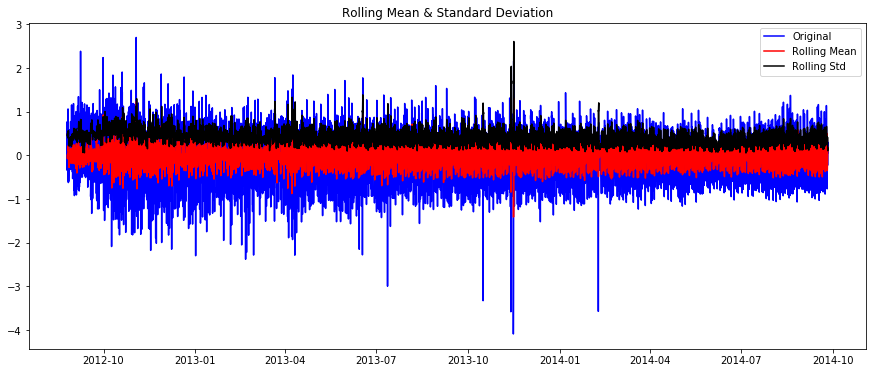

Results of Dickey-Fuller Test:
Test Statistic                   -24.228718
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18231.000000
Critical Value (5%)               -2.861699
Critical Value (1%)               -3.430709
Critical Value (10%)              -2.566854
dtype: float64


In [15]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,halflife=12,min_periods=0).mean()
  """Entry point for launching an IPython kernel.


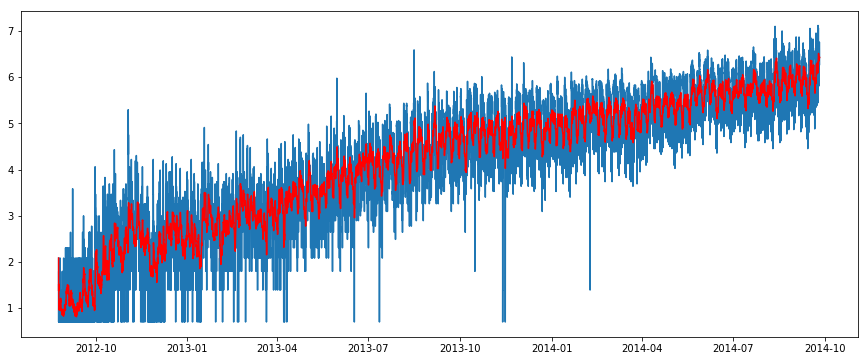

In [16]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  import sys


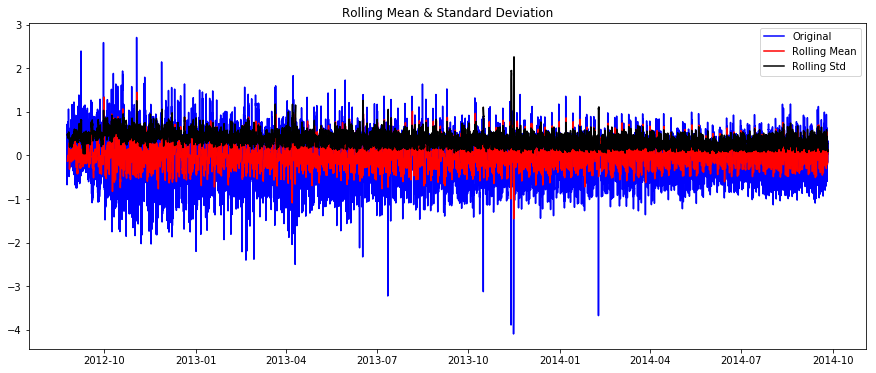

Results of Dickey-Fuller Test:
Test Statistic                   -21.006745
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (5%)               -2.861698
Critical Value (1%)               -3.430709
Critical Value (10%)              -2.566854
dtype: float64


In [17]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

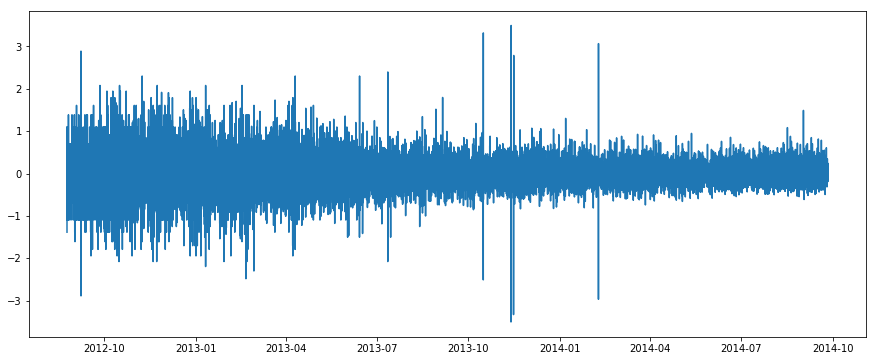

In [18]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  import sys


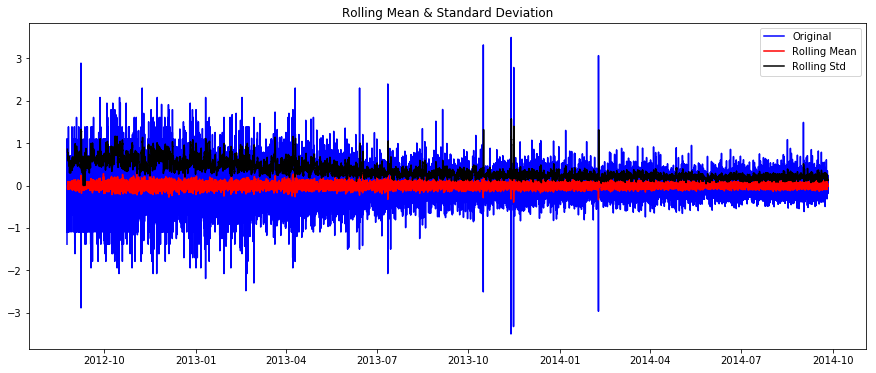

Results of Dickey-Fuller Test:
Test Statistic                   -32.041628
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18241.000000
Critical Value (5%)               -2.861698
Critical Value (1%)               -3.430709
Critical Value (10%)              -2.566854
dtype: float64


In [19]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

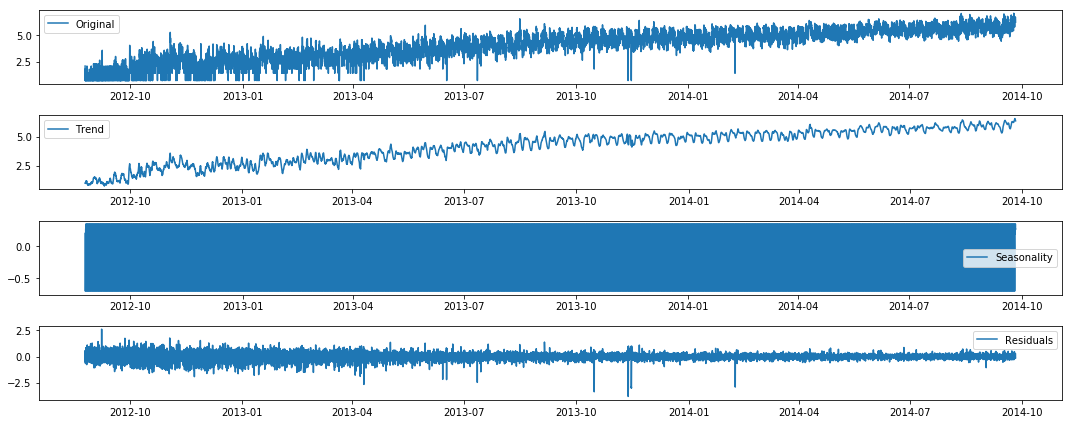

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  
c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  import sys


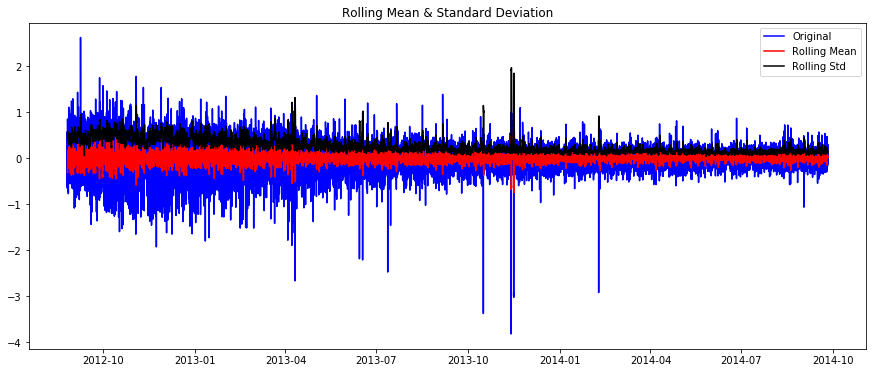

Results of Dickey-Fuller Test:
Test Statistic                   -32.205683
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18218.000000
Critical Value (5%)               -2.861699
Critical Value (1%)               -3.430709
Critical Value (10%)              -2.566854
dtype: float64


In [21]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [22]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [23]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

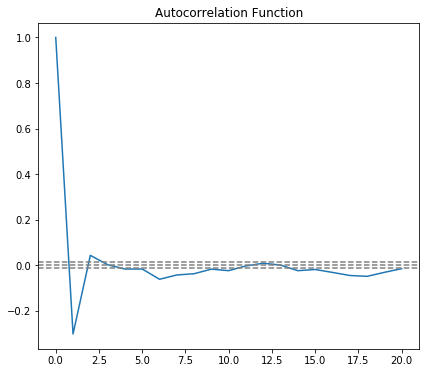

In [24]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

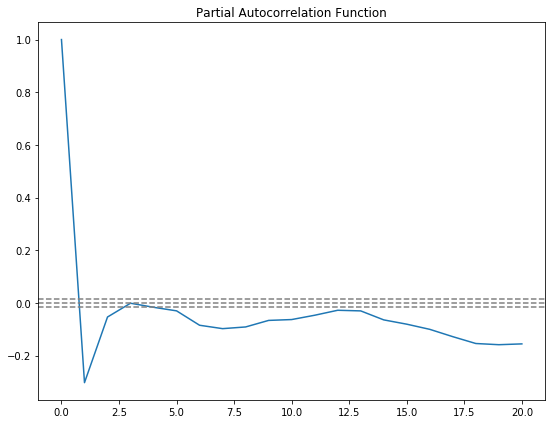

In [25]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [26]:
from statsmodels.tsa.arima_model import ARIMA

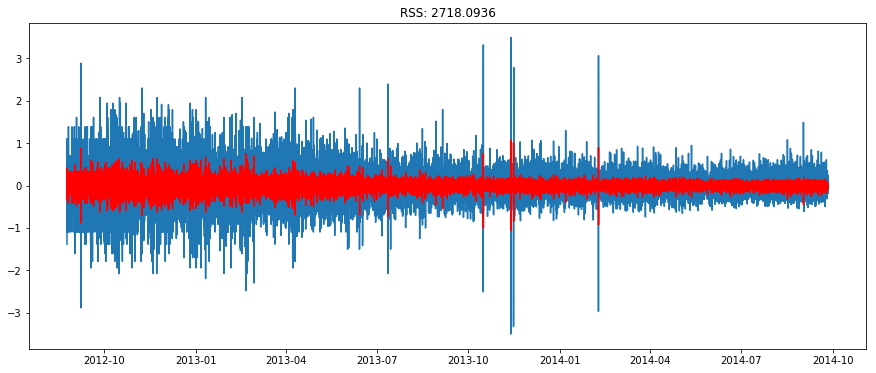

In [27]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

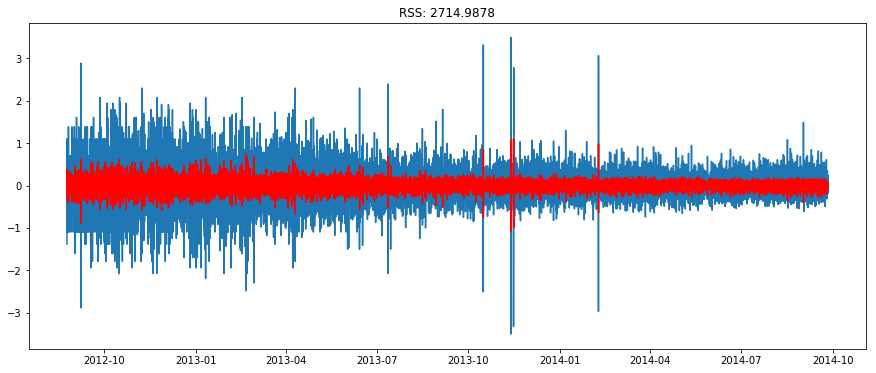

In [28]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

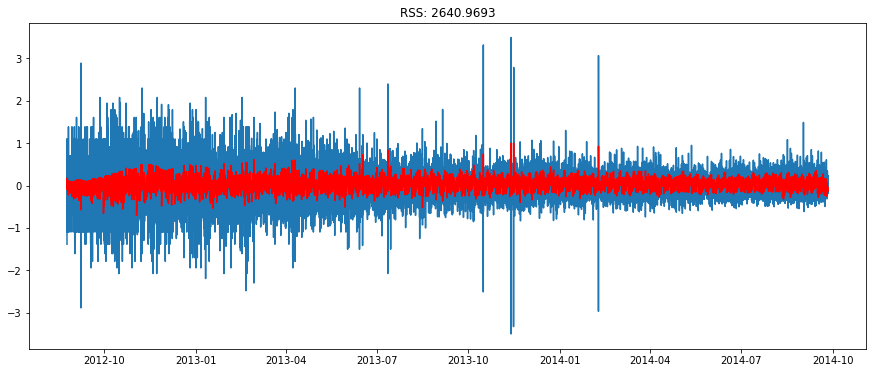

In [29]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [30]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Datetime
2012-08-25 01:00:00    0.000282
2012-08-25 02:00:00    0.171766
2012-08-25 03:00:00    0.002078
2012-08-25 04:00:00    0.164745
2012-08-25 05:00:00    0.149921
dtype: float64


In [31]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Datetime
2012-08-25 01:00:00    0.000282
2012-08-25 02:00:00    0.172048
2012-08-25 03:00:00    0.174126
2012-08-25 04:00:00    0.338871
2012-08-25 05:00:00    0.488792
dtype: float64


In [32]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


Datetime
2012-08-25 00:00:00    2.079442
2012-08-25 01:00:00    2.079723
2012-08-25 02:00:00    2.251489
2012-08-25 03:00:00    2.253568
2012-08-25 04:00:00    2.418312
dtype: float64

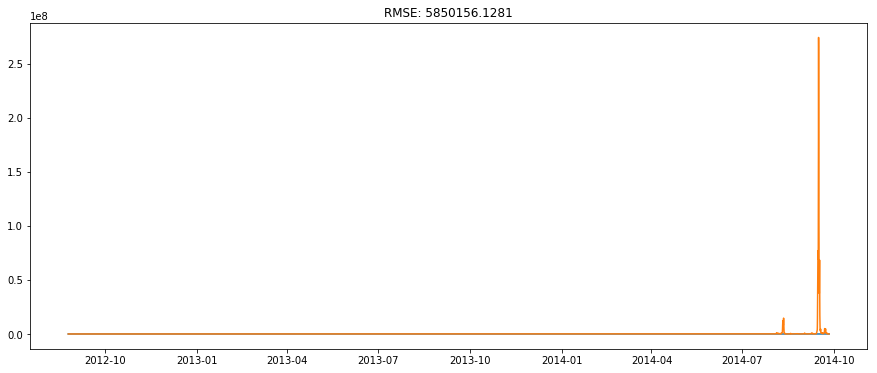

In [33]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [34]:
forecast = results_ARIMA.forecast(steps=5112)[0]

In [35]:
forecast[0]

6.2597876419553771

In [36]:
forecast[5111]

7.636297030312182

In [37]:
start_index = datetime(2014, 9, 25)
end_index = datetime(2015, 4, 25)

results_ARIMA.predict()

2012-08-25 01:00:00    0.000282
2012-08-25 02:00:00    0.171766
2012-08-25 03:00:00    0.002078
2012-08-25 04:00:00    0.164745
2012-08-25 05:00:00    0.149921
2012-08-25 06:00:00    0.137556
2012-08-25 07:00:00    0.127083
2012-08-25 08:00:00    0.118102
2012-08-25 09:00:00   -0.088527
2012-08-25 10:00:00    0.120422
2012-08-25 11:00:00    0.113410
2012-08-25 12:00:00   -0.103696
2012-08-25 13:00:00   -0.019166
2012-08-25 14:00:00    0.118705
2012-08-25 15:00:00   -0.106360
2012-08-25 16:00:00    0.120370
2012-08-25 17:00:00    0.115181
2012-08-25 18:00:00    0.110425
2012-08-25 19:00:00    0.106049
2012-08-25 20:00:00    0.102009
2012-08-25 21:00:00    0.098269
2012-08-25 22:00:00   -0.137532
2012-08-25 23:00:00    0.100985
2012-08-26 00:00:00    0.097650
2012-08-26 01:00:00   -0.054401
2012-08-26 02:00:00   -0.140127
2012-08-26 03:00:00    0.102403
2012-08-26 04:00:00   -0.051447
2012-08-26 05:00:00    0.101546
2012-08-26 06:00:00    0.098743
                         ...   
2014-09-

In [38]:
forecast = np.exp(forecast)

In [39]:
forecast[0]

523.10784215365936

In [40]:
forecast

array([  523.10784215,   515.09442643,   509.18108506, ...,  2070.88956208,
        2071.47311351,  2072.05682938])

In [41]:
len(forecast)

5112

In [42]:
test = pd.read_csv('test.csv')

In [43]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [44]:
test = test['ID']

In [45]:
test.head()

0    18288
1    18289
2    18290
3    18291
4    18292
Name: ID, dtype: int64

In [46]:
test['Count'] = forecast

c:\users\shreyansh singh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
test.head()

0    18288
1    18289
2    18290
3    18291
4    18292
Name: ID, dtype: object

In [48]:
type(forecast)

numpy.ndarray

In [49]:
type(test)

pandas.core.series.Series

In [77]:
test = pd.read_csv('test.csv')

In [78]:
test = test['ID']

In [79]:
type(test)

pandas.core.series.Series

In [80]:
test = test.as_matrix()

In [81]:
test

array([18288, 18289, 18290, ..., 23397, 23398, 23399], dtype=int64)

In [82]:
submit = pd.DataFrame( {
        "ID": test,
        "Count": forecast
})

In [83]:
submit.to_csv('submission.csv')

In [84]:
forecast = forecast.astype(int)

In [86]:
submit = pd.DataFrame( {
        "ID": test,
        "Count": forecast
})
submit = submit[['ID', 'Count']]
submit.to_csv('submission.csv', index=False)